In [1]:
import random
random.seed(122)

import csv
import pandas as pd
import numpy as np
import xgboost as xgb
import time

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn import metrics
from sklearn.model_selection import train_test_split

from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from xgboost import DMatrix
from matplotlib import pyplot

with open('ml_features_201710.csv','rb') as data:
    features = pd.read_csv(data)
      
   
start = time.time()  

features=features.rename(columns = {'interact':'label'})

#convert labels to boolean values
features.loc[features['label']=='YES','label']=1
features.loc[features['label']=='NO','label']=0

features = features[features.columns.drop(list(features.filter(regex='Pathogen')))]

#shuffle dataframe
features = features.sample(frac=1).reset_index(drop=True)

# Labels are the values we want to predict
labels = np.array(features['label'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('label', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

#Using Skicit-learn to split data into training and testing sets

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.30, random_state = 42)
end = time.time()

print(round(end - start,2)," seconds elapsed")
print(feature_list)


(0.29, ' seconds elapsed')
['Host_Ala', 'Host_Arg', 'Host_Asn', 'Host_Asp', 'Host_Cys', 'Host_Gln', 'Host_Glu', 'Host_Gly', 'Host_His', 'Host_Ile', 'Host_Leu', 'Host_Lys', 'Host_Met', 'Host_Phe', 'Host_Pro', 'Host_Ser', 'Host_Thr', 'Host_Trp', 'Host_Tyr', 'Host_Val', 'GO_Similarity_Score']


(11.87, ' seconds elapsed')
[[7218  844]
 [ 863 7186]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      8062
           1       0.89      0.89      0.89      8049

   micro avg       0.89      0.89      0.89     16111
   macro avg       0.89      0.89      0.89     16111
weighted avg       0.89      0.89      0.89     16111

('Accuracy:', 0.8940475451554838)


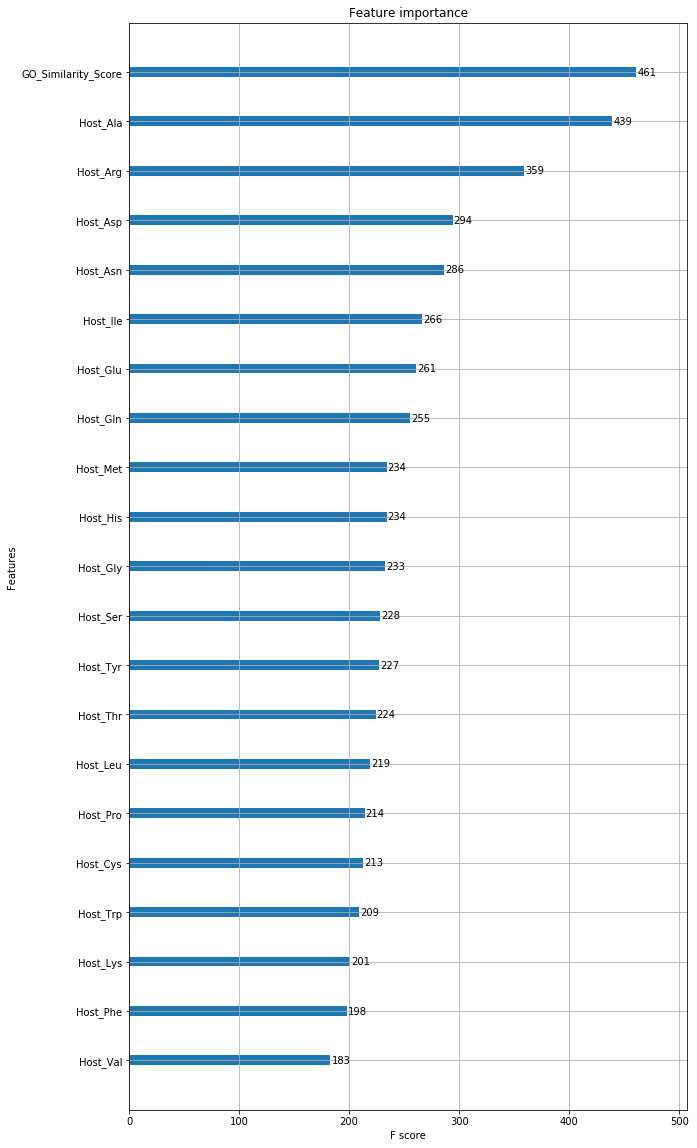

In [2]:
#source https://xgboost.readthedocs.io/en/latest/get_started.html
start = time.time()

dtrain = DMatrix(train_features,label=train_labels,feature_names=feature_list)
dtest = DMatrix(test_features,label=test_labels,feature_names=feature_list)
# specify parameters via map
#param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic' }
param = {'silent':1}
num_round = 100
bst = xgb.train(param, dtrain, num_round)
# make prediction
predictions = bst.predict(dtest)

end = time.time()

print(round(end - start,2)," seconds elapsed")


print(confusion_matrix(test_labels,predictions.round()))  
print(classification_report(test_labels,predictions.round()))  


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels,predictions.round()))


# plot feature importance
#refference https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
fig, ax = pyplot.subplots(figsize=(10,20))
plot_importance(bst, ax=ax)
pyplot.show()

(43.55, ' seconds elapsed')
[[   0    0    0]
 [   1 7391  670]
 [   0  660 7389]]
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.92      0.92      0.92      8062
         1.0       0.92      0.92      0.92      8049

   micro avg       0.92      0.92      0.92     16111
   macro avg       0.61      0.61      0.61     16111
weighted avg       0.92      0.92      0.92     16111

('Accuracy:', 0.9173856371423251)


/home/bwjoyce/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


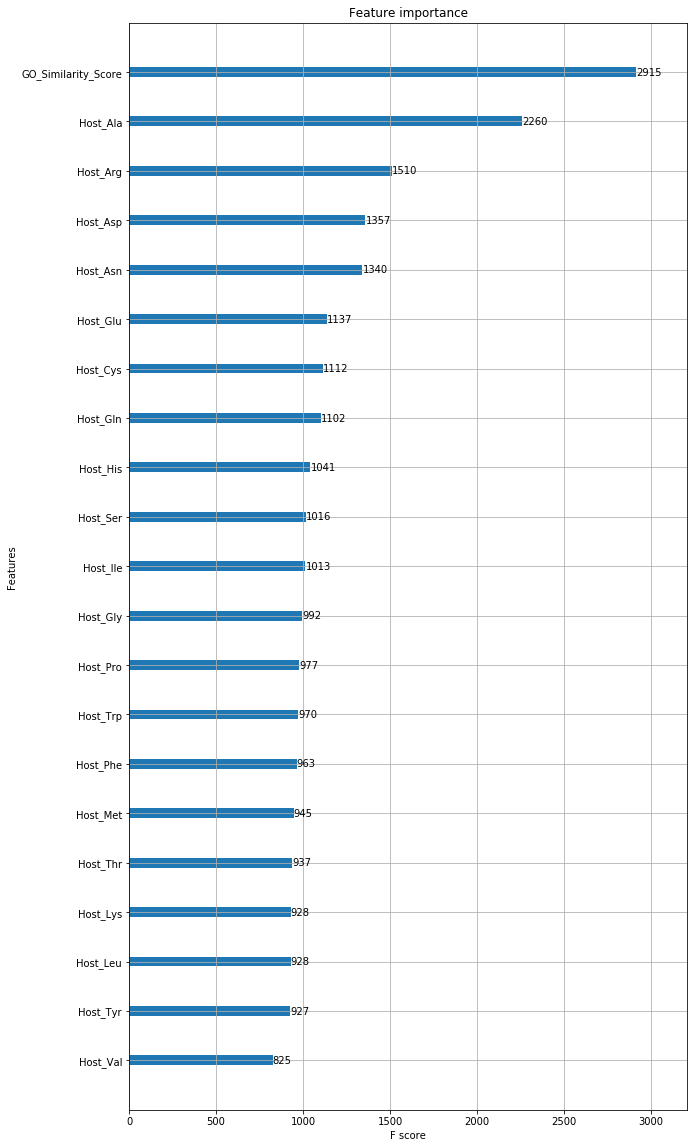

In [3]:
#source https://xgboost.readthedocs.io/en/latest/get_started.html
start = time.time()

dtrain = DMatrix(train_features,label=train_labels,feature_names=feature_list)
dtest = DMatrix(test_features,label=test_labels,feature_names=feature_list)
# specify parameters via map
#param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic' }
param = {'silent':1}
num_round = 500
bst = xgb.train(param, dtrain, num_round)
# make prediction
predictions = bst.predict(dtest)

end = time.time()

print(round(end - start,2)," seconds elapsed")


print(confusion_matrix(test_labels,predictions.round()))  
print(classification_report(test_labels,predictions.round()))  


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels,predictions.round()))


# plot feature importance
#refference https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
fig, ax = pyplot.subplots(figsize=(10,20))
plot_importance(bst, ax=ax)
pyplot.show()

In [4]:
#random forest.  Source Link: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0 and https://www.datacamp.com/community/tutorials/random-forests-classifier-python
start = time.time() 

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Instantiate model with 100 decision trees  
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);


# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

#calcualte the accuracy
accuracy = sum(predictions.round() == test_labels)/test_labels.size
# Print out the Accuracy
print('Accuracy:', 100*round(accuracy, 4), '%.')

end = time.time()

print(round(end - start,2)," seconds elapsed")


print(confusion_matrix(test_labels,predictions.round()))  
print(classification_report(test_labels,predictions.round()))  


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels,predictions.round()))

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
#[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
for pair in feature_importances:
    print("Variable: {:20} Importance: {}".format(*pair))





('Accuracy:', 0.0, '%.')
(84.56, ' seconds elapsed')
[[7339  723]
 [ 851 7198]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      8062
           1       0.91      0.89      0.90      8049

   micro avg       0.90      0.90      0.90     16111
   macro avg       0.90      0.90      0.90     16111
weighted avg       0.90      0.90      0.90     16111

('Accuracy:', 0.9023027745018931)
Variable: GO_Similarity_Score  Importance: 0.21
Variable: Host_Arg             Importance: 0.13
Variable: Host_Ile             Importance: 0.06
Variable: Host_Asp             Importance: 0.05
Variable: Host_Cys             Importance: 0.04
Variable: Host_Glu             Importance: 0.04
Variable: Host_Tyr             Importance: 0.04
Variable: Host_Ala             Importance: 0.03
Variable: Host_Asn             Importance: 0.03
Variable: Host_Gln             Importance: 0.03
Variable: Host_Gly             Importance: 0.03
Variable: Host_His             

In [5]:
#omitted GO_Similarity_Score and all pathogen columns
#re-import data without columns that have less than 0.02 from the above feature importance print out

#random forest.  Source Link: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0 and https://www.datacamp.com/community/tutorials/random-forests-classifier-python

with open('ml_features_201710.csv','rb') as data:
    features = pd.read_csv(data)
      
   
start = time.time()  

features=features.rename(columns = {'interact':'label'})

#remove columns 
features = features[features.columns.drop(list(features.filter(regex='Pathogen|GO_S')))]

#convert labels to boolean values
features.loc[features['label']=='YES','label']=1
features.loc[features['label']=='NO','label']=0

#shuffle dataframe
features = features.sample(frac=1).reset_index(drop=True)

# Labels are the values we want to predict
labels = np.array(features['label'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('label', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

start = time.time() 




# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);


# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

end = time.time()

print(str(round(end - start,2))+" seconds elapsed")


print(confusion_matrix(test_labels,predictions.round()))  
print(classification_report(test_labels,predictions.round()))  


# Model Accuracy, how often is the classifier correct?
print("Accuracy:"+str(metrics.accuracy_score(test_labels,predictions.round())))

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 

for pair in feature_importances:
    print("Variable: {:20} Importance: {}".format(*pair))






84.39 seconds elapsed
[[7339  723]
 [ 851 7198]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      8062
           1       0.91      0.89      0.90      8049

   micro avg       0.90      0.90      0.90     16111
   macro avg       0.90      0.90      0.90     16111
weighted avg       0.90      0.90      0.90     16111

Accuracy:0.9023027745018931
Variable: Host_Arg             Importance: 0.13
Variable: Host_Ile             Importance: 0.06
Variable: Host_Asp             Importance: 0.05
Variable: Host_Cys             Importance: 0.04
Variable: Host_Glu             Importance: 0.04
Variable: Host_Tyr             Importance: 0.04
Variable: Host_Ala             Importance: 0.03
Variable: Host_Asn             Importance: 0.03
Variable: Host_Gln             Importance: 0.03
Variable: Host_Gly             Importance: 0.03
Variable: Host_His             Importance: 0.03
Variable: Host_Leu             Importance: 0.03
Variable: Host_Lys  

(48.07, ' seconds elapsed')
[[7248  867]
 [ 648 7348]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      8115
           1       0.89      0.92      0.91      7996

   micro avg       0.91      0.91      0.91     16111
   macro avg       0.91      0.91      0.91     16111
weighted avg       0.91      0.91      0.91     16111

('Accuracy:', 0.9059648687232326)


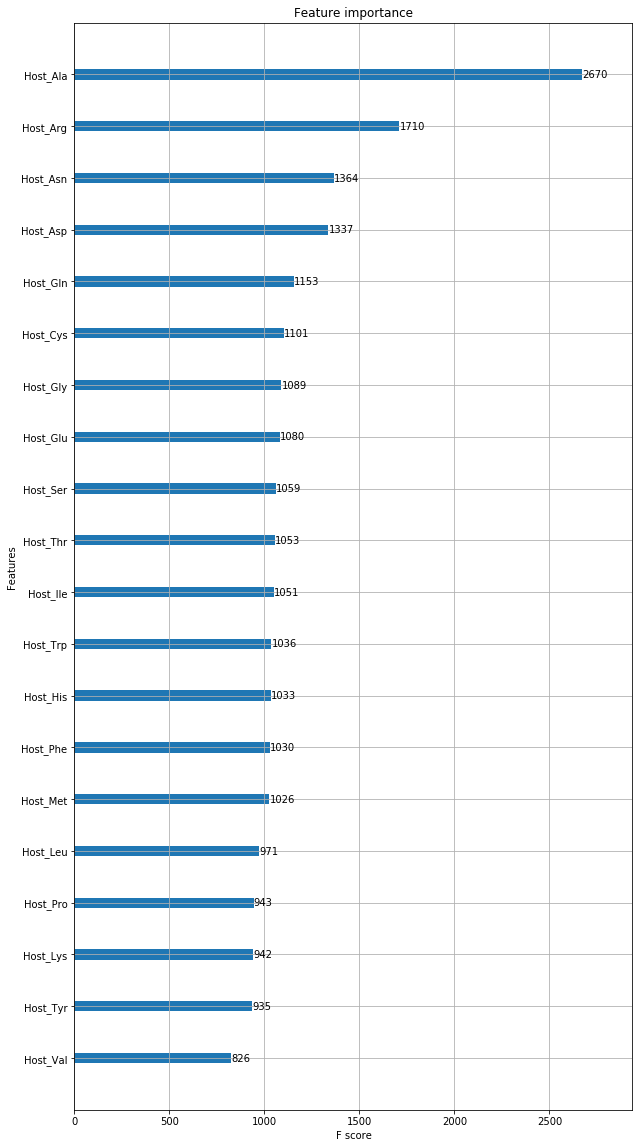

In [6]:
#omitted GO_Similarity_Score and all pathogen columns

#forgot this in above cell
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.30, random_state = 42)


#source https://xgboost.readthedocs.io/en/latest/get_started.html
start = time.time()

dtrain = DMatrix(train_features,label=train_labels,feature_names=feature_list)
dtest = DMatrix(test_features,label=test_labels,feature_names=feature_list)
# specify parameters via map
#param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic' }
param = {'silent':1}
num_round = 500
bst = xgb.train(param, dtrain, num_round)
# make prediction
predictions = bst.predict(dtest)

end = time.time()

print(round(end - start,2)," seconds elapsed")


print(confusion_matrix(test_labels,predictions.round()))  
print(classification_report(test_labels,predictions.round()))  


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels,predictions.round()))


# plot feature importance
#refference https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
fig, ax = pyplot.subplots(figsize=(10,20))
plot_importance(bst, ax=ax)
pyplot.show()

(9.42, ' seconds elapsed')
[[7025 1090]
 [ 745 7251]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      8115
           1       0.87      0.91      0.89      7996

   micro avg       0.89      0.89      0.89     16111
   macro avg       0.89      0.89      0.89     16111
weighted avg       0.89      0.89      0.89     16111

('Accuracy:', 0.8861026627769847)


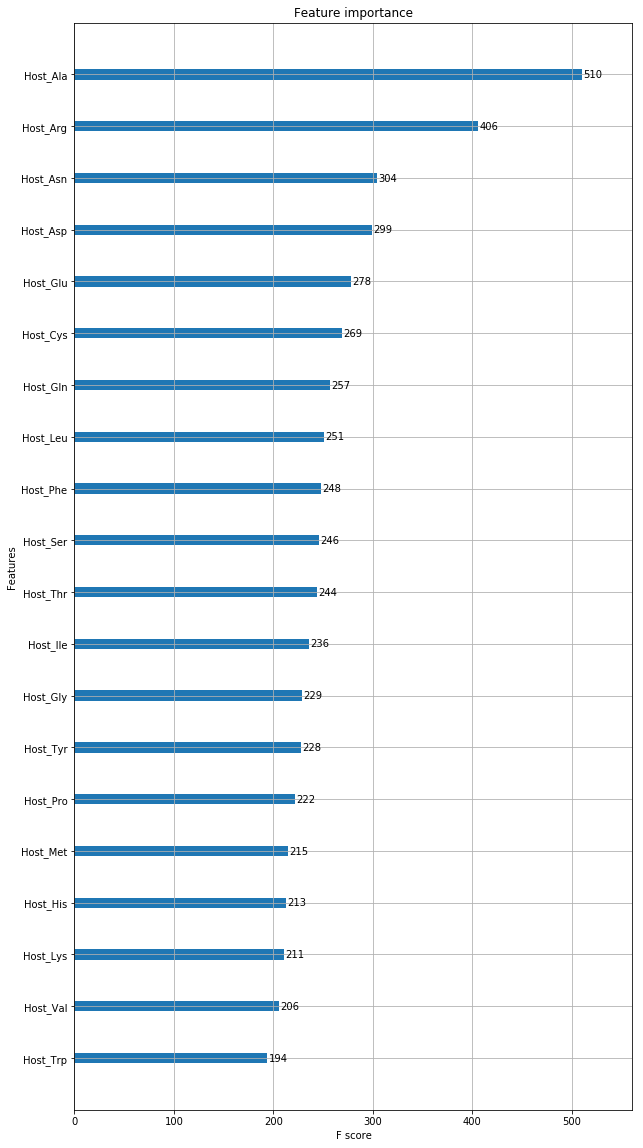

In [7]:
#omitted GO_Similarity_Score and all pathogen columns

#forgot this in above cell
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.30, random_state = 42)


#source https://xgboost.readthedocs.io/en/latest/get_started.html
start = time.time()

dtrain = DMatrix(train_features,label=train_labels,feature_names=feature_list)
dtest = DMatrix(test_features,label=test_labels,feature_names=feature_list)
# specify parameters via map
#param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic' }
param = {'silent':1}
num_round = 100
bst = xgb.train(param, dtrain, num_round)
# make prediction
predictions = bst.predict(dtest)

end = time.time()

print(round(end - start,2)," seconds elapsed")


print(confusion_matrix(test_labels,predictions.round()))  
print(classification_report(test_labels,predictions.round()))  


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels,predictions.round()))


# plot feature importance
#refference https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
fig, ax = pyplot.subplots(figsize=(10,20))
plot_importance(bst, ax=ax)
pyplot.show()